### Dual Averaging MPI


In [ ]:
import numpy as np
import random
from typing import NamedTuple
from  scipy.special import softmax
import matplotlib.pyplot as plt


In [7]:

S = 2
A = 3
S_set = np.arange(S)
A_set = np.arange(A)
gamma = 0.6

#例1.5準拠
#g(s,a)
g = np.zeros((S,A))
g[0][0] = 5
g[0][1] = 10
g[0][2] = 2
g[1][0] = 1


#P(s'|s,a)
P = np.zeros((S,S,A))
P[0][0][0] = 0.8
P[1][0][0] = 0.2
P[1][0][1] = 1
P[0][0][2] = 1
P[1][1][0] = 1
P = np.transpose(P, (1, 2, 0))


class MDP(NamedTuple):
    S_set: np.array  # 状態集合
    A_set: np.array  # 行動集合
    gamma: float  # 割引率
    g: np.array  # 報酬行列
    P: np.array  # 遷移確率行列
    mu: np.array

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)

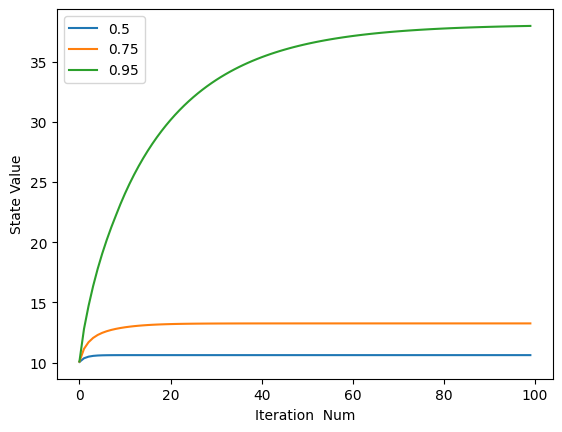

In [ ]:
pi = np.zeros((S,A))
#決定的方策を作成
#softmax方策を作る必要がある
pi[0][0] = 1
pi[1][1] = 1
v = np.zeros(S)
entropy_term = 0.1
mdp2 = MDP(S_set, A_set, 0.5, g, P)


_lambda = 0.1
tau = 0.1
#regularized greedy policyの定義
def KL_divergence(p, q):
    return np.sum(p * (np.log(p)-np.log(q)))

def entropy(p):
    return -np.sum(p * np.log(p))

#πの集合、muはどうやって定義するのか
PI = []
mu = []
#muがpkになる
#pi *
def function_for_calc_greedy_policy(Q,pi,mu,_lambda,tau)
    return np.sum(pi * Q) - _lambda * KL_divergence(pi, mu) + tau * entropy(pi)

def compute_regularized_greedy_policy(Q):
  max_result = -float('inf')
  for pi in PI:
    result = function_for_calc_greedy_policy(Q,pi,mu,_lambda,tau)
    if result > max_result:
            max_result = result
            max_pi = pi

  return max_pi


def compute_Q_pi_with_regularized_term(mdp2,Q,pi):
    S,A = mdp2.S,mdp2.A
    v = np.sum(pi * Q,axis = 1)
    P_v = P @ (v -  0.1 * KL_divergence(pi,mu)+entropy(pi))
    Q_pi = g + mdp2.gamma * P_v
    return Q_pi




def compute_Q_pi(mdp2,Q,pi):
    S,A = mdp2.S,mdp2.A
    v = np.sum(pi * Q,axis = 1)
    P_v = P @ (v -  0.1 * np.sum( pi * np.log(pi+1e-8),axis = 1))
    Q_pi = g + mdp2.gamma * P_v
    return Q_pi

updated_v = v
gammas = [0.5,0.75,0.95]
for gamma in gammas:
    mdp2 = mdp2._replace(gamma=gamma)
    v_value = []
    pi = np.ones((S,A))/A
    Q = np.zeros((S,A))
    for i in range(100):
        Q= compute_Q_pi(mdp2,Q,pi)
        pi = softmax(Q,axis=1)
        v_value.append(Q.max())
    plt.plot(v_value,label = f"{gamma}")

plt.ylabel("State Value")
plt.xlabel("Iteration  Num")

plt.legend()

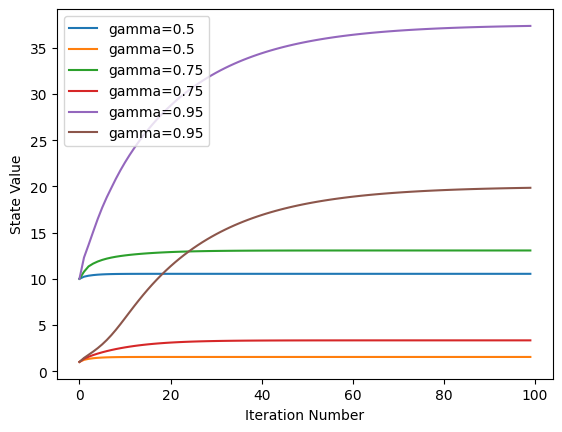

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax


def dual_averaging_step(Q, h, k, _lambda, tau):
    if tau == 0:
        h = h + Q / (k + 2)
    else:
        beta = _lambda / (_lambda + tau)
        h = beta * h + (1 - beta) * Q
    return h

def compute_dual_averaging_policy(h, _lambda, tau):
    if tau == 0:
        pi = softmax(h / _lambda, axis=1)
    else:
        pi = softmax(h, axis=1)
    return pi

def compute_Q_with_dual_averaging(mdp, Q, pi, h, _lambda, tau):
    S, A = mdp.S, mdp.A
    v = np.sum(pi * Q, axis=1)
    P_v = mdp.P @ v
    Q_new = mdp.g + mdp.gamma * P_v
    return Q_new, dual_averaging_step(Q_new, h, k, _lambda, tau)

# Main loop with Dual Averaging MPI
mdp = mdp2  # mdp2 is from your provided code
Q = np.zeros((mdp.S, mdp.A))
h = np.zeros_like(Q)
pi = np.ones((mdp.S, mdp.A)) / mdp.A

# Initialize h for tau > 0
if tau > 0:
    h = np.zeros_like(Q) - 1 / (1 - mdp.gamma)

v_values = []
gammas = [0.5, 0.75, 0.95]

for gamma in gammas:
    mdp = mdp._replace(gamma=gamma)
    v_value = []
    pi = np.ones((mdp.S, mdp.A)) / mdp.A
    Q = np.zeros((mdp.S, mdp.A))
    h = np.zeros_like(Q) if tau == 0 else np.zeros_like(Q) - 1 / (1 - mdp.gamma)

    for k in range(100):
        Q, h = compute_Q_with_dual_averaging(mdp, Q, pi, h, _lambda, tau)
        pi = compute_dual_averaging_policy(h, _lambda, tau)
        v_value.append(np.max(Q, axis=1))
    plt.plot(v_value, label=f"gamma={gamma}")

plt.ylabel("State Value")
plt.xlabel("Iteration Number")
plt.legend()
plt.show()

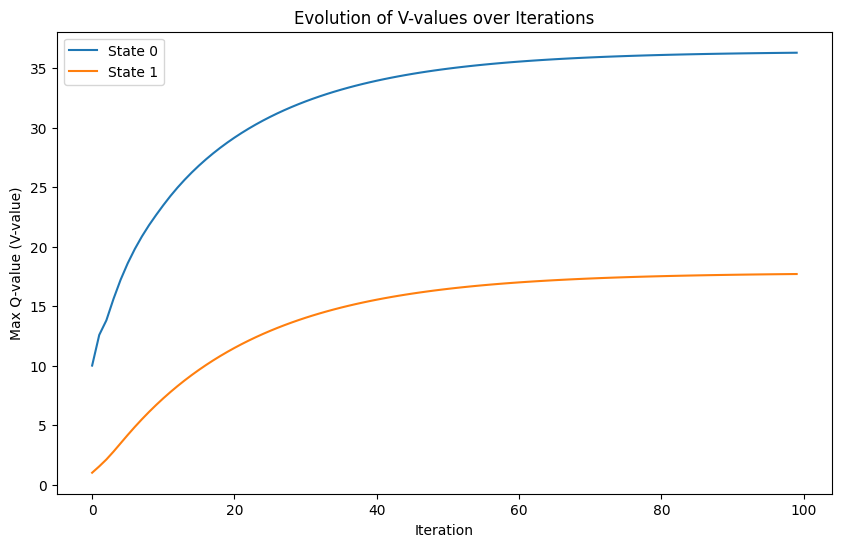

In [12]:
#Dual Averaging MPI

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
mu = np.ones((S, A)) / A

def compute_policy_from_h(h, lambda_, k, tau):
    if tau == 0:
        return softmax(h / (lambda_ / (k + 1)), axis=1)
    else:
        beta = lambda_ / (lambda_ + tau)
        return softmax(h / beta, axis=1)

def update_h(h, q, k, lambda_, tau):
    if tau == 0:
        return (k + 1) / (k + 2) * h + q / (k + 2)
    else:
        beta = lambda_ / (lambda_ + tau)
        return beta * h + (1 - beta) * q

def compute_bellman_operator(mdp, Q, pi, lambda_, tau):
    S, A = mdp.S, mdp.A
    g = mdp.g
    P = mdp.P
    gamma = mdp.gamma

    # Compute the value function of the policy
    V = np.sum(pi * Q, axis=1)

    # Initialize Q_pi with immediate rewards
    Q_pi = g.copy()

    for s in range(S):
        for a in range(A):
            # Compute the expected value over next states
            # Note: Ensure that P is defined such that P[s, a] gives the transition probabilities
            # from state s using action a to all possible next states.
            Q_pi[s, a] += gamma * np.sum(P[s, a, :] * V)

    if lambda_ > 0:
        # If we have a lambda term, we subtract the KL-divergence times lambda
        for s in range(S):
            Q_pi[s, :] -= lambda_ * KL_divergence(pi[s, :], mu[s, :])

    if tau > 0:
        # If we have a tau term, we add the entropy times tau
        for s in range(S):
            Q_pi[s, :] += tau * entropy(pi[s, :])

    return Q_pi

# Dual Averaging MPI main loop
mdp = mdp2  # mdp2 is from your provided code
_lambda = 0.1  # lambda regularization term
tau = 0.1  # tau regularization term
h = np.zeros((mdp.S, mdp.A))
Q = np.zeros((mdp.S, mdp.A))
pi = np.ones((mdp.S, mdp.A)) / mdp.A
v_values = []  # List to store the maximum Q-value for visualization

for k in range(100):
    pi = compute_policy_from_h(h, _lambda, k, tau)
    Q = compute_bellman_operator(mdp, Q, pi, _lambda, 0)
    h = update_h(h, Q, k, _lambda, tau)
    v = np.max(Q, axis=1)  # Compute max Q-value for each state
    v_values.append(v)

# Plotting
v_values_array = np.array(v_values)

# Plotting
plt.figure(figsize=(10, 6))
for s in range(mdp.S):
    # Here, we index the array to get all values for state 's' across all iterations
    plt.plot(v_values_array[:, s], label=f"State {s}")
plt.title("Evolution of V-values over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Max Q-value (V-value)")
plt.legend()
plt.show()